<a href="https://colab.research.google.com/github/nikhil1029/Nikhil_INFO5502_Spring2022/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import csv as csv
import matplotlib
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

train_df = pd.read_table("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/train_luc.csv", sep=',',header=0)

print("\n Total Number of samples:",train_df.shape[0],"and Total number of features:",train_df.shape[1],"\n")


 Total Number of samples: 9174 and Total number of features: 12 



In [ ]:
#Adding of Columns Hour and Month
def hour_of_day(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").time().hour
def month_of_day(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").month
train_df['hour'] = train_df['datetime'].map(hour_of_day)
train_df['month'] = train_df['datetime'].map(month_of_day)
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1


In [ ]:
train_df.shape

(9174, 12)

hours: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Text(0.5, 1.0, 'Measured bike use over 2 years')

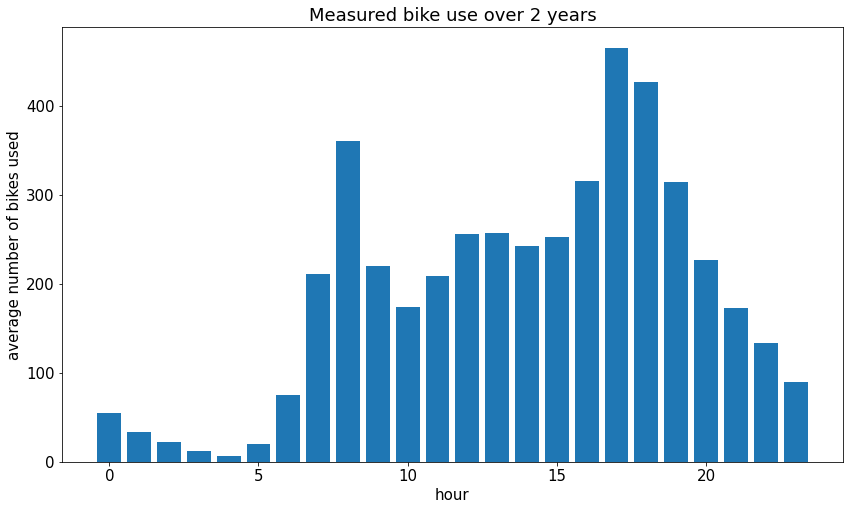

In [ ]:
# now let's take a look at the amerage amount of bike use for each hour of the day
# as a "sanity check" to make sure the data makes sense before going further
hours = np.unique(train_df['hour'])
print("hours:",hours)

hours_mean = {}
for h in hours:
    temp_df = train_df.loc[train_df['hour'] == h]
    hours_mean[h] = temp_df['count'].mean()

# plot the results. Maybe should see peaks from bike commuting or evening use
plt.rcParams['figure.figsize'] = (14, 8)
plt.bar(hours,[hours_mean[h] for h in hours])
plt.xlabel("hour")
plt.ylabel("average number of bikes used")
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
matplotlib.rc('font', size=15)
plt.title("Measured bike use over 2 years")


months: [ 1  2  3  4  5  6  7  8  9 10 11 12]


Text(0.5, 1.0, 'Bikes used for over 2 years')

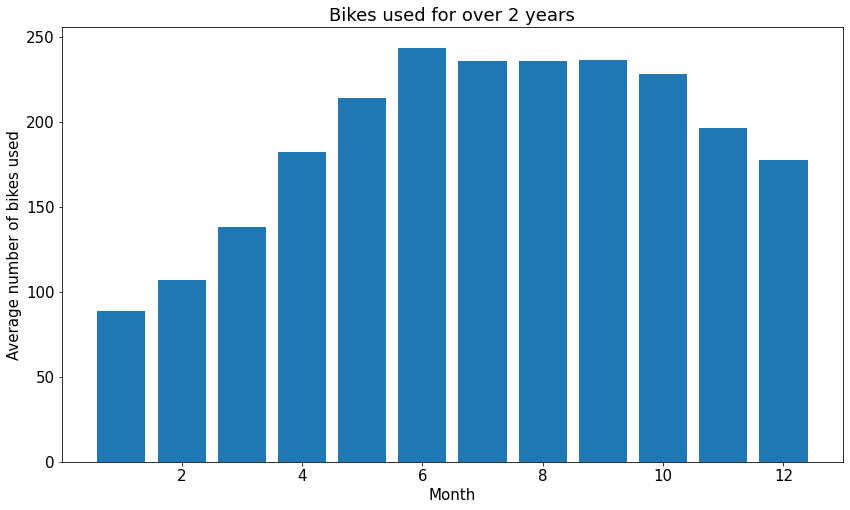

In [ ]:
months = np.unique(train_df['month'])
print("months:",months)

months_mean = {}
for h in months:
    temp_df = train_df.loc[train_df['month'] == h]
    months_mean[h] = temp_df['count'].mean()

# plot the results. Maybe should see peaks from bike commuting or evening use
plt.rcParams['figure.figsize'] = (14, 8)
plt.bar(months,[months_mean[h] for h in months])
plt.xlabel("Month")
plt.ylabel("Average number of bikes used")
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title("Bikes used for over 2 years")

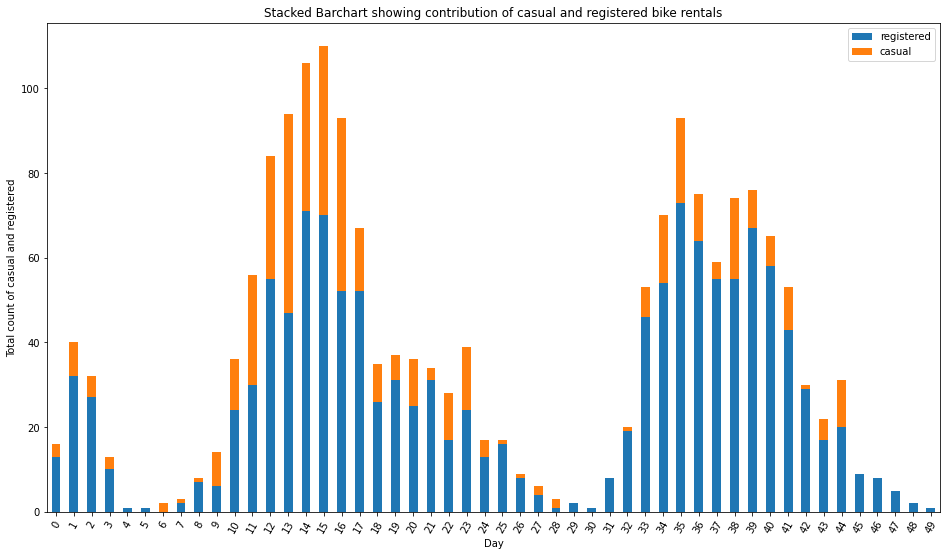

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [16, 9]
train_df[['registered', 'casual']][:50].plot(kind='bar', stacked=True)
plt.title("Stacked Barchart showing contribution of casual and registered bike rentals")
plt.xlabel("Day")
plt.ylabel("Total count of casual and registered")
plt.xticks(rotation=60)
plt.show()
    


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


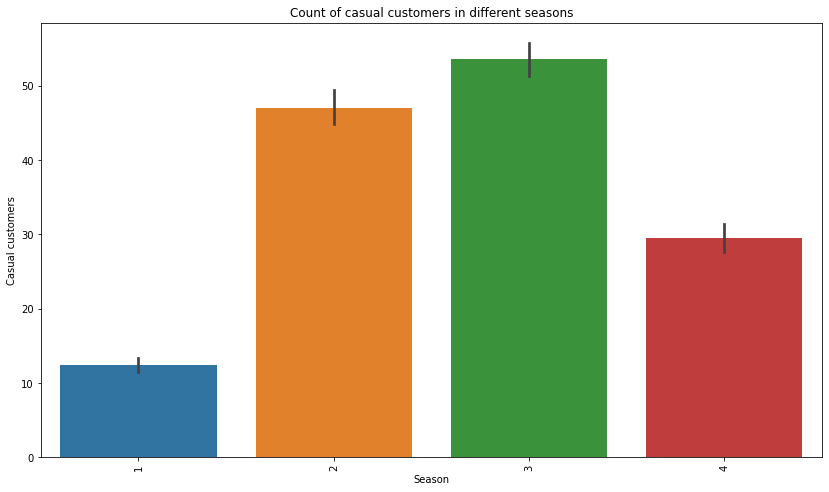

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [14, 8]
ax = sns.barplot('season', 'casual', data = train_df)
plt.title("Count of casual customers in different seasons")
plt.xlabel("Season")
plt.ylabel("Casual customers")
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


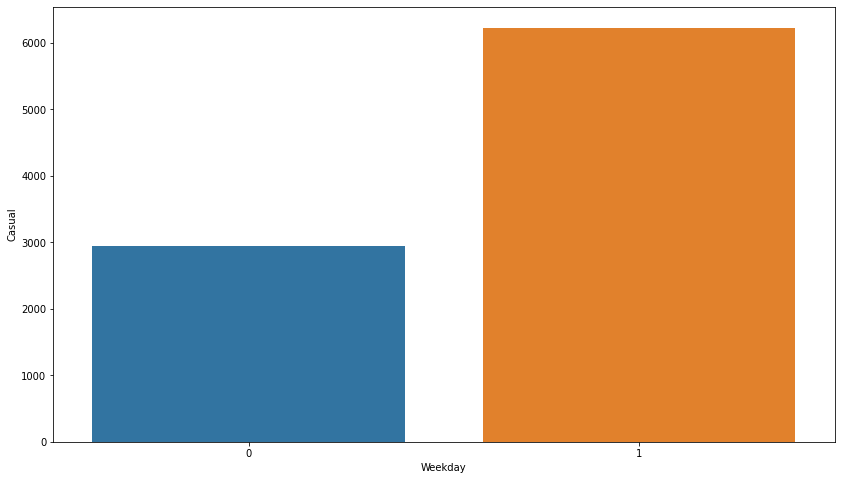

In [ ]:
ax = sns.countplot(train_df['workingday'])

plt.xlabel('Weekday')
plt.ylabel('Casual')
plt.show()


In [ ]:
# we convert the below columns into categorical
for i in ['season', 'weather', 'holiday', 'workingday']:
    train_df[i] = train_df[i].astype('object')

# Dummification of the below columns in the dataset
one_hot_df = pd.get_dummies(train_df[['season', 'holiday', 'workingday', 'weather']])
# we drop unnecessary columns
A = train_df.drop(['datetime','casual','registered', 'season', 'holiday', 'workingday', 'weather', 'count'], axis=1)
# we append the dummies data to the original data
A = A.join(one_hot_df)
# target column
B = train_df['count']

In [ ]:
A = train_df.drop(['datetime','casual','registered', 'season', 'holiday', 'workingday', 'weather', 'count'], axis=1)
A = A.join(one_hot_df)
B = train_df['casual']

In [ ]:
#This is to look for best fit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 500, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(A, B)
grid_search.best_params_

Fitting 2 folds for each of 288 candidates, totalling 576 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
kfold = KFold(n_splits=5, shuffle=True, random_state=None)
for train, test in kfold.split(train_df):
    print('train: %s, test: %s' % (train, test))

train: [   0    1    2 ... 9171 9172 9173], test: [   9   15   18 ... 9154 9166 9169]
train: [   0    2    3 ... 9171 9172 9173], test: [   1    4    5 ... 9164 9165 9168]
train: [   0    1    3 ... 9170 9171 9173], test: [   2    6    8 ... 9158 9162 9172]
train: [   0    1    2 ... 9171 9172 9173], test: [   3   14   16 ... 9161 9167 9170]
train: [   1    2    3 ... 9169 9170 9172], test: [   0   12   24 ... 9160 9171 9173]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR


model = RandomForestRegressor(n_estimators = 500,max_depth=100)
print("Selected Columns:",cols)
print(model)

Selected Columns: ['hour', 'month', 'season']
RandomForestRegressor(max_depth=100, n_estimators=500)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# using Random Forest Regressor to find the count values
forest = RandomForestRegressor(random_state = 211)
forest.fit(X.iloc[train], y.iloc[train])
forest_ypred = forest.predict(X.iloc[test])
mse = mean_squared_error(y.iloc[test], forest_ypred)
print("RMSE:", np.sqrt(mse))
r_squared = r2_score(y.iloc[test], forest_ypred)
print("R2 Score: ", r_squared)
forest_test_pred = forest.predict(sample_data)
forest_test_pred

In [56]:
# fit the selected model TO YOUR FULL TRAINING SET
model.fit( bike_df[cols], bike_df['count'])
predict_count = model.predict(test_df[cols])
model.fit( bike_df[cols], bike_df['casual'])
predict_casual = model.predict(test_df[cols])
model.fit( bike_df[cols], bike_df['registered'])
predict_registered = model.predict(test_df[cols])

# apply to the test data FOR WHICH YOU DON'T HAVE THE ANSWERS
# (not the "test set" you used for model selection and tuning) 
# add the prediction column (in case you want to inspect it later)
test_df['count'] = predict_count
test_df['casual'] = predict_casual
test_df['registered'] = predict_registered
test_df['sum of casual and registered'] = predict_casual+predict_registered

sample_df = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/sample_prediction.csv', sep=",")

#comparing with the sample data 
print("count of sum of casual and registered data RMS error of sample data:",np.sqrt(mean_squared_error(sample_df['count'],predict_casual+predict_registered)))
print("count RMS error of sample data:",np.sqrt(mean_squared_error(sample_df['count'],predict_count)))

# save the predicted count as a csv with a header column and datetime row
test_df = test_df[['datetime','count','casual','registered','sum of casual and registered']].to_csv('my_prediction.csv',    index=False, header=True)
print("Prediction complete. Saved as my_prediction.csv")

count of sum of casual and registered data RMS error of sample data: 97.06540057946759
count RMS error of sample data: 96.14127425047012
Prediction complete. Saved as my_prediction.csv